# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [96]:
#import libs
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Load Data, replace ? to NaN, rename the features to the above instruction names 
feature_labels = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16']
credit_approval = pd.read_csv('crx.data',header=None,na_values='?',names=feature_labels)
credit_approval.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [16]:
# Shape matches 
credit_approval.shape

(690, 16)

In [17]:
#Sum the NaNs across features
credit_approval.isna().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [32]:
#Cast types to match the instructions 
print(credit_approval.dtypes)
credit_approval['A11'] = credit_approval['A11'].astype(float)
credit_approval['A15'] = credit_approval['A11'].astype(float)

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11    float64
A12     object
A13     object
A14    float64
A15    float64
A16     object
dtype: object


In [33]:
#Check the types were cast correctly 
credit_approval.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11    float64
A12     object
A13     object
A14    float64
A15    float64
A16     object
dtype: object

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [34]:
# Replace A16 to 0 for rejected and 1 for approved 
credit_approval['A16'] = credit_approval['A16'].replace({'-': 0, '+': 1})

In [35]:
credit_approval['A16'].unique()

array([1, 0])

In [45]:
#Create separate dataframes for approved and rejected
approved = credit_approval.loc[credit_approval['A16']==1]
print(approved.head())

  A1     A2     A3 A4 A5 A6 A7    A8 A9 A10  A11 A12 A13    A14  A15  A16
0  b  30.83  0.000  u  g  w  v  1.25  t   t  1.0   f   g  202.0  1.0    1
1  a  58.67  4.460  u  g  q  h  3.04  t   t  6.0   f   g   43.0  6.0    1
2  a  24.50  0.500  u  g  q  h  1.50  t   f  0.0   f   g  280.0  0.0    1
3  b  27.83  1.540  u  g  w  v  3.75  t   t  5.0   t   g  100.0  5.0    1
4  b  20.17  5.625  u  g  w  v  1.71  t   f  0.0   f   s  120.0  0.0    1


In [47]:
rejected = credit_approval.loc[credit_approval['A16']==0]
rejected.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
70,b,32.33,7.5,u,g,e,bb,1.585,t,f,0.0,t,s,420.0,0.0,0
71,b,34.83,4.0,u,g,d,bb,12.500,t,f,0.0,t,g,NaN,0.0,0
72,a,38.58,5.0,u,g,cc,v,13.500,t,f,0.0,t,g,980.0,0.0,0
73,b,44.25,0.5,u,g,m,v,10.750,t,f,0.0,f,s,400.0,0.0,0
74,b,44.83,7.0,y,p,c,v,1.625,f,f,0.0,f,g,160.0,0.0,0


In [53]:
print(credit_approval.describe(exclude=np.number))
credit_approval.describe(exclude=np.object)

         A1   A4   A5   A6   A7   A9  A10  A12  A13
count   678  684  684  681  681  690  690  690  690
unique    2    3    3   14    9    2    2    2    3
top       b    u    g    c    v    t    f    f    g
freq    468  519  519  137  399  361  395  374  625


,A2,A3,A8,A11,A14,A15,A16
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.00000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,2.40000,0.444928
std,11.957862,4.978163,3.346513,4.86294,173.806768,4.86294,0.497318
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.00000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,0.00000,0.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,3.00000,1.000000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,67.00000,1.000000


In [48]:
print(approved.shape)
rejected.shape

(307, 16)


(383, 16)

In [51]:
print(approved.describe(exclude=np.number))
approved.describe(exclude=np.object)

         A1   A4   A5   A6   A7   A9  A10  A12  A13
count   304  303  303  303  303  307  307  307  307
unique    2    3    3   14    9    2    2    2    3
top       b    u    g    c    v    t    t    f    g
freq    206  256  256   62  169  284  209  161  287


,A2,A3,A8,A11,A14,A15,A16
count,305.000000,307.000000,307.000000,307.000000,301.000000,307.000000,307.0
mean,33.720492,5.904951,3.427899,4.605863,164.421927,4.605863,1.0
std,12.809641,5.471485,4.120792,6.320242,161.770675,6.320242,0.0
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,23.170000,1.500000,0.750000,0.000000,0.000000,0.000000,1.0
50%,30.500000,4.460000,2.000000,3.000000,120.000000,3.000000,1.0
75%,41.330000,9.520000,5.000000,7.000000,280.000000,7.000000,1.0
max,76.750000,28.000000,28.500000,67.000000,840.000000,67.000000,1.0


In [52]:
print(rejected.describe(exclude=np.number))
rejected.describe(exclude=np.object)

         A1   A4   A5   A6   A7   A9  A10  A12  A13
count   374  381  381  378  378  383  383  383  383
unique    2    2    2   14    9    2    2    2    3
top       b    u    g    c    v    f    f    f    g
freq    262  263  263   75  230  306  297  213  338


,A2,A3,A8,A11,A14,A15,A16
count,373.000000,383.000000,383.000000,383.000000,376.000000,383.000000,383.0
mean,29.808231,3.839948,1.257924,0.631854,199.699468,0.631854,0.0
std,10.919291,4.337662,2.120481,1.900049,181.564835,1.900049,0.0
min,15.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,22.000000,0.835000,0.125000,0.000000,100.000000,0.000000,0.0
50%,27.330000,2.210000,0.415000,0.000000,167.500000,0.000000,0.0
75%,34.830000,5.000000,1.500000,0.000000,272.000000,0.000000,0.0
max,80.250000,26.335000,13.875000,20.000000,2000.000000,20.000000,0.0


In [67]:
# Define a function that takes a feature as an argument and returns a 2 sample ttest (for approved + rejected) result
def ttest(feature): 
    #Omit NaNs when calling .ttest_ind
    stat, pvalue = st.ttest_ind(approved[feature], rejected[feature], nan_policy='omit')
    ttest_result = {'stat':stat,'pvalue':pvalue}
    return ttest_result

In [94]:
# Continuous features
cont_feat = ['A2','A3','A8','A11','A14','A15']

# Run the above ttest function for each continuous feature
for c in cont_feat:
    if ttest(c)['pvalue'] < .05:
        print(f"Feature {c}\nT Statistic: {ttest(c)['stat']}\npvalue:{ttest(c)['pvalue']}\n")
    else:
        print(f"We cannot reject the null hypothesis that these two samples have identical average values.")

Feature A2
T Statistic: 4.2922156166315535
pvalue:2.0276637071781407e-05

Feature A3
T Statistic: 5.52998337614816
pvalue:4.551680702308068e-08

Feature A8
T Statistic: 8.935819983773698
pvalue:3.6710537401601785e-18

Feature A11
T Statistic: 11.667004222431277
pvalue:7.957718568079967e-29

Feature A14
T Statistic: -2.6358251986645476
pvalue:0.008586135473979569

Feature A15
T Statistic: 11.667004222431277
pvalue:7.957718568079967e-29



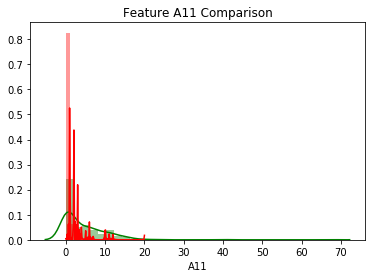

In [112]:
sns.distplot(approved['A11'], color="green", label="plus")
sns.distplot(rejected['A11'], color="red", label="minus")
plt.title('Feature A11 Comparison');

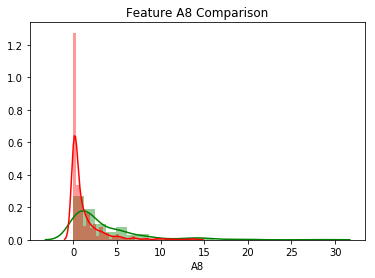

In [109]:
sns.distplot(approved['A8'], color="green", label="plus")
sns.distplot(rejected['A8'], color="red", label="minus")
plt.title('Feature A8 Comparison');

In [143]:
#Drop NaNs 
approved['A14'].dropna(inplace=True)
rejected['A14'].dropna(inplace=True)

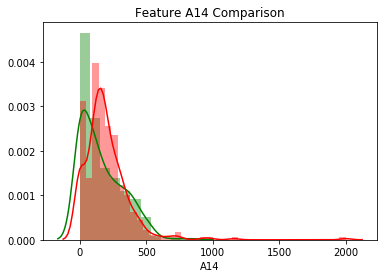

In [144]:
sns.distplot(approved['A14'], color="green", label="plus")
sns.distplot(rejected['A14'], color="red", label="minus")
plt.title('Feature A14 Comparison');

In [120]:
#Categorical features (9)
cat_feat = ['A1','A4','A5','A6','A7','A9','A10','A12','A13']

# Explore approval split via crosstabs for each feature
for c in credit_approval[cat_feat]:
    print(f"{pd.crosstab(credit_approval['A16'],credit_approval[c],margins=True)}\n")

A1     a    b  All
A16               
0    112  262  374
1     98  206  304
All  210  468  678

A4   l    u    y  All
A16                  
0    0  263  118  381
1    2  256   45  303
All  2  519  163  684

A5     g  gg    p  All
A16                   
0    263   0  118  381
1    256   2   45  303
All  519   2  163  684

A6   aa    c  cc   d   e  ff   i   j   k   m   q  r   w   x  All
A16                                                             
0    35   75  12  23  11  46  45   7  37  22  27  1  31   6  378
1    19   62  29   7  14   7  14   3  14  16  51  2  33  32  303
All  54  137  41  30  25  53  59  10  51  38  78  3  64  38  681

A7   bb  dd  ff    h  j  n  o    v  z  All
A16                                       
0    34   4  49   51  5  2  1  230  2  378
1    25   2   8   87  3  2  1  169  6  303
All  59   6  57  138  8  4  2  399  8  681

A9     f    t  All
A16               
0    306   77  383
1     23  284  307
All  329  361  690

A10    f    t  All
A16               
0

In [145]:
#Apply chi-squared tests for categorical features
for c in credit_approval[cat_feat]:
    chi2, p, dof, expected = st.chi2_contingency(pd.crosstab(credit_approval['A16'],credit_approval[c]))
    print(f"{c}\nTest stat:{chi2}\npvalue:{p}\nDegrees of freedom:{dof}\nExpected frequencies:{expected}")
    if p < .05:
        print('We can reject the null hypothesis that these variables are independent.\n')
    else:
        print('We cannot reject null hypothesis that these variables are independent\n')


A1
Test stat:0.3112832649161994
pvalue:0.5768937883001118
Degrees of freedom:1
Expected frequencies:[[115.84070796 258.15929204]
 [ 94.15929204 209.84070796]]
We cannot reject null hypothesis that these variables are independent

A4
Test stat:26.234074966202144
pvalue:2.010680204180363e-06
Degrees of freedom:2
Expected frequencies:[[  1.11403509 289.09210526  90.79385965]
 [  0.88596491 229.90789474  72.20614035]]
We can reject the null hypothesis that these variables are independent.

A5
Test stat:26.234074966202144
pvalue:2.010680204180363e-06
Degrees of freedom:2
Expected frequencies:[[289.09210526   1.11403509  90.79385965]
 [229.90789474   0.88596491  72.20614035]]
We can reject the null hypothesis that these variables are independent.

A6
Test stat:98.32520342679135
pvalue:3.4999300402715717e-15
Degrees of freedom:13
Expected frequencies:[[29.97356828 76.04405286 22.75770925 16.65198238 13.87665198 29.4185022
  32.74889868  5.55066079 28.30837004 21.09251101 43.29515419  1.665198

In [ ]:
#More extreme are A1, A12 where we could not reject the null hypothesis. 
#Less extreme were the remaining categorical features

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

1) I ran a ttest on all of the continuous features. The more extreme example I explored was feature A11, where the calculated t statistic was > 11 and very low p-value. This tells us that the A11 feature for approvals is quite a (positive) departure from rejections. Meaning that there is a significant difference between the means and could potentially have a relationship with approvals. Conversely (less extreme), while still a low p-value, the A14 feature's approvals was just below the rejections.

2) For this, I also ran chi-squared tests for all of the categorical features. The more extreme examples were features A1 and A12 where we could not reject the null hypothesis that these variables are independent. In the cases where we did reject the null hypothesis, we can say that the feature potentially has a relationship with the approval feature. 

3) Honestly, I think the most challenging part was just planning the exploration. I knew what I had to do re: code, libraries, etc. but just organizing each aspect took some rework. For example, I thought about running both types of tests multiple times but given it was repeatitive, I scrapped that and wrote a function to do each test for all of their respective features to have a better view of each, speed up the process, and reduce any repetitive code. 